In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("yelp.csv", index_col=0)

In [3]:
df.drop(["review_id","user_id","business_id",'date'],axis=1, inplace=True)

In [4]:
def make_len(sen):
    return len(sen)

In [5]:
df["text_len"] = df["text"].apply(make_len)

C:\Users\wjddn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stars', ylabel='count'>

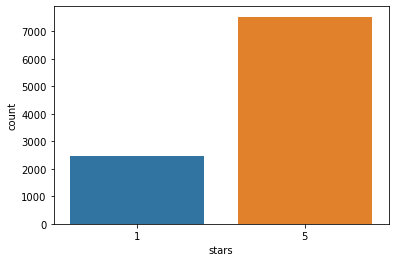

In [6]:
sns.countplot(df['stars'])

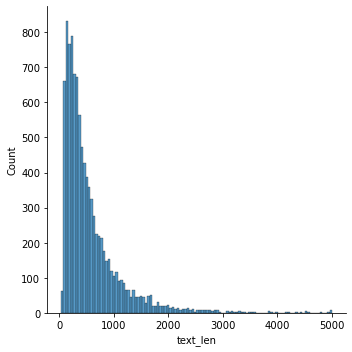

In [7]:
sns.displot(df["text_len"])

In [8]:
df.corr()

,stars,useful,funny,cool,text_len
stars,1.000000,-0.098825,-0.089860,0.060101,-0.221752
useful,-0.098825,1.000000,0.656630,0.525962,0.161592
funny,-0.089860,0.656630,1.000000,0.741797,0.215003
cool,0.060101,0.525962,0.741797,1.000000,0.193500
text_len,-0.221752,0.161592,0.215003,0.193500,1.000000


<AxesSubplot:>

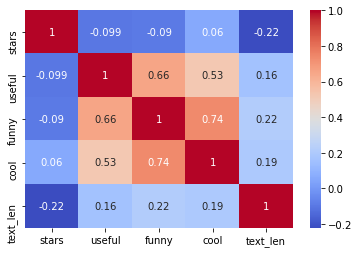

In [9]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

In [10]:
import string

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
s = df.iloc[0].text

In [13]:
s

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [14]:
def remove_punc(x):
    new_s = []
    for i in x:
        if i not in string.punctuation:
            new_s.append(i)
    new_s = ''.join(new_s)    
    return new_s

In [15]:
df["text"].apply(remove_punc)

2967245    LOVE the cheeses here  They are worth the pric...
4773684    This has become our goto sushi place The sushi...
1139855    I was very disappointed with the hotel The res...
3997153    Love this place  super amazing  staff here is ...
4262000    Thank you Dana Having dyed my hair black previ...
                                 ...                        
1567641    Im a sucker for places like this Get me in fro...
4910763    Extremely rude staff  Was told 4 min on a larg...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer then look no ...
838267     Awesome food Awesome beer Awesome service Need...
Name: text, Length: 10000, dtype: object

In [16]:
s

'LOVE the cheeses here.  They are worth the price.  Great for finding treats for a special dinner or picnic.  Nice on sample days. Yum!!! Top quality meats. Nice selection of non brand frozen veggies.  Veggie chips are mega tasty.  Always quick and friendly check out.  Produce not as stellar as it once was, but also not finding better in Madison.'

In [17]:
''.join([i for i in s if i not in string.punctuation])

'LOVE the cheeses here  They are worth the price  Great for finding treats for a special dinner or picnic  Nice on sample days Yum Top quality meats Nice selection of non brand frozen veggies  Veggie chips are mega tasty  Always quick and friendly check out  Produce not as stellar as it once was but also not finding better in Madison'

In [18]:
df["text"] = df['text'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

In [19]:
df.head()

,stars,text,useful,funny,cool,text_len
2967245,5,LOVE the cheeses here They are worth the pric...,0,0,1,347
4773684,5,This has become our goto sushi place The sushi...,0,0,0,377
1139855,1,I was very disappointed with the hotel The res...,2,1,1,663
3997153,5,Love this place super amazing staff here is ...,0,0,0,141
4262000,5,Thank you Dana Having dyed my hair black previ...,0,0,0,455


In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wjddn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords

In [22]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
s.split()

['LOVE',
 'the',
 'cheeses',
 'here.',
 'They',
 'are',
 'worth',
 'the',
 'price.',
 'Great',
 'for',
 'finding',
 'treats',
 'for',
 'a',
 'special',
 'dinner',
 'or',
 'picnic.',
 'Nice',
 'on',
 'sample',
 'days.',
 'Yum!!!',
 'Top',
 'quality',
 'meats.',
 'Nice',
 'selection',
 'of',
 'non',
 'brand',
 'frozen',
 'veggies.',
 'Veggie',
 'chips',
 'are',
 'mega',
 'tasty.',
 'Always',
 'quick',
 'and',
 'friendly',
 'check',
 'out.',
 'Produce',
 'not',
 'as',
 'stellar',
 'as',
 'it',
 'once',
 'was,',
 'but',
 'also',
 'not',
 'finding',
 'better',
 'in',
 'Madison.']

In [24]:
s.lower()

'love the cheeses here.  they are worth the price.  great for finding treats for a special dinner or picnic.  nice on sample days. yum!!! top quality meats. nice selection of non brand frozen veggies.  veggie chips are mega tasty.  always quick and friendly check out.  produce not as stellar as it once was, but also not finding better in madison.'

In [25]:
def stop_w(x):
    
    new_s = []

    for i in x.split():
        if i.lower() not in stopwords.words("english"):
            new_s.append(i.lower())
    return new_s

In [26]:
df['text'] = df['text'].apply(stop_w)

In [35]:
word_split = []
for i in range(len(df)):
    for j in df.iloc[i]['text']:
        word_split.append(j)

In [38]:
len(word_split)

542773

In [39]:
from nltk.probability import FreqDist

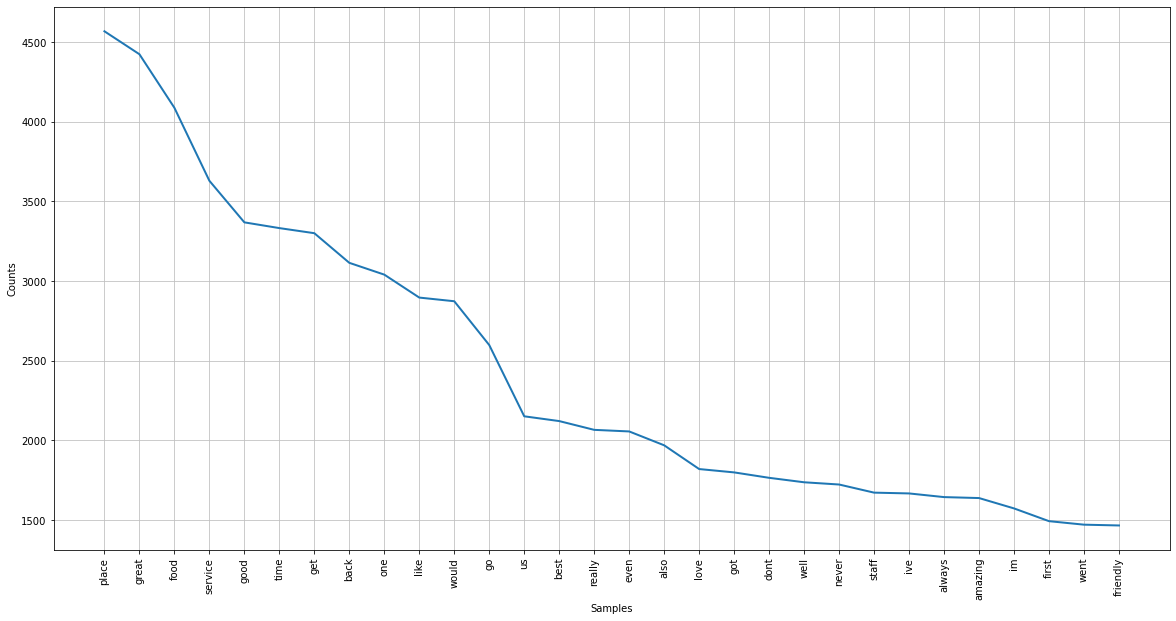

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [41]:
plt.figure(figsize=(20,10))
FreqDist(word_split).plot(30)

In [42]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

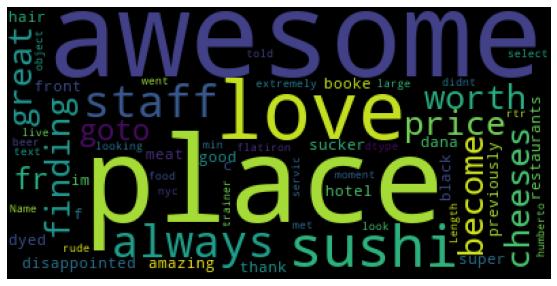

In [45]:
wc = WordCloud().generate(str(df['text']))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')

In [48]:
good = df[df['stars'] ==5]['text']

In [49]:
bad = df[df['stars'] ==1]['text']

(-0.5, 399.5, 199.5, -0.5)

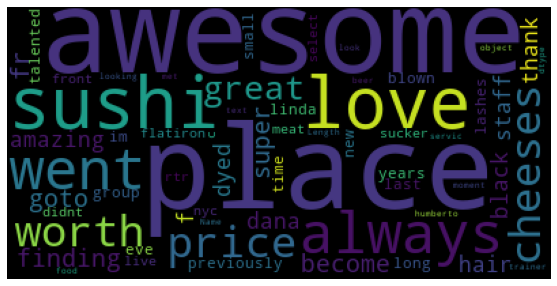

In [50]:
wc = WordCloud().generate(str(good))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

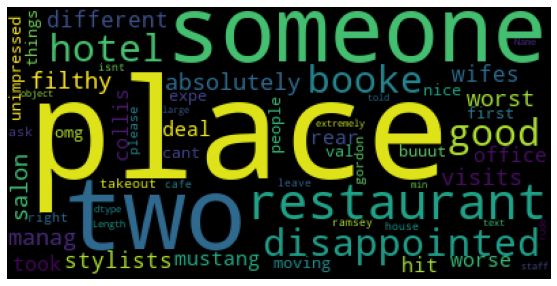

In [51]:
wc = WordCloud().generate(str(bad))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')